In [1]:
import numpy as np
import matplotlib.pylab as plt
from __future__ import division
import time

In [2]:
# Burer-Monteiro Utils
def proj_tang(u,sigma):
    return u-np.diag(np.diag(u.dot(sigma.T))).dot(sigma)

def proj_mani(sigma):
    res=sigma/np.outer(np.sqrt(np.sum(sigma**2,axis=1)),np.ones(sigma.shape[1]))
    return res

def gradf(sigma,reg):
    n=sigma.shape[0]
    return 2*((B+reg*np.eye(n))-np.diag(np.diag((B+reg*(np.eye(n))).dot(sigma).dot(sigma.T)))).dot(sigma)
#     return 2*(B-np.diag(np.diag(B.dot(sigma).dot(sigma.T)))).dot(sigma)

def max_eachrow(X):
    res=np.zeros(X.shape)
    idx=np.abs(X).argmax(axis=1)
    for row in range(res.shape[0]):
        res[row,idx[row]]=np.sign(X[row,idx[row]])
    return res

def softth(X,thres):
    return np.sign(X)*np.maximum(np.abs(X)-thres,0)



# SDP Utils
def proj_simplex(v, s=1):
    n = v.shape[0]
    if v.sum() == s and np.alltrue(v >= 0):
        return v
    u = np.sort(v)[::-1]
    cssv = np.cumsum(u)
    rho = np.nonzero(u * np.arange(1, n+1) > (cssv - s))[0][-1]
    theta = float(cssv[rho] - s) / rho
    w = (v - theta).clip(min=0)
    return w

def proj_l1(v, s=1):
    n = v.shape[0]
    u = np.abs(v)
    if u.sum() <= s:
        return v
    w = proj_simplex(u, s=s)
    w *= np.sign(v)
    return w

def proj_1inf(Y,lamb):
    res=np.zeros((Y.shape))
    for i in range(Y.shape[0]):
        res[i,:]=Y[i,:]-proj_l1(Y[i,:],lamb)
    return res

def proj_A(X):
    n=X.shape[0]
    temp1=np.append((X-np.diag(np.diag(X))).dot(np.ones(n))*2,np.diag(X))-b
    mu1,nu1=temp1[:n],temp1[n:]
    temp2=np.append(1/(2*(n-2))*(mu1-np.ones(n)*(np.sum(mu1)/(2*n-2))),nu1)
    mu2,nu2=temp2[:n],temp2[n:]
    temp=np.outer(mu2,np.ones(n))
    res=X-((temp+temp.T-2*np.diag(mu2))+np.diag(nu2))
    return res

def proj_B(X):
    res=X-np.diag(np.diag(X)-b)
    return res

def proj_psd(X):
    w,v=np.linalg.eig((X+X.T)/2)
    idx=(w>=0)
    res=v[:,idx].dot(np.diag(w[idx])).dot(v[:,idx].T)
    return res

def softth(X,lamb):
    return np.sign(X)*np.maximum(np.abs(X)-lamb,0)

In [3]:
# Psi=np.asarray([
#     [.670,.072,.020,.023,.186,.187],
#     [.072,.570,.321,.016,.160,.107],
#     [.020,.321,.555,.048,.111,.188],
#     [.023,.016,.048,.494,.081,.137],
#     [.186,.160,.111,.081,.475,.031],
#     [.187,.107,.188,.137,.031,.295],
# ])
# n1=100
# Z_gt=np.asarray([1,0,0,0,0,0]*n1+[0,1,0,0,0,0]*n1+[0,0,1,0,0,0]*n1+[0,0,0,1,0,0]*n1\
#                    +[0,0,0,0,1,0]*n1+[0,0,0,0,0,1]*n1).reshape(6*n1,6)

# Psi=np.asarray([
#     [.300,.080,.100,.120],
#     [.080,.200,.100,.100],
#     [.100,.100,.200,.100],
#     [.120,.100,.100,.200]
# ])

Psi=np.asarray([
    [.300,.080,.100,.080],
    [.080,.250,.080,.100],
    [.100,.080,.250,.080],
    [.080,.100,.080,.250]
])

n=100
Z_gt=np.asarray([1,0,0,0]*(n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(4*n,4)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
X_gt=Z_gt.dot(Z_gt.T)

A=np.random.binomial(1,Mz)
n=A.shape[0]
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))

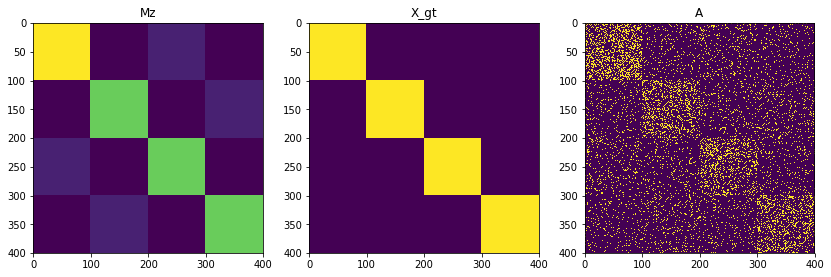

In [4]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.title('Mz')
plt.imshow(Mz)

plt.subplot(132)
plt.title('X_gt')
plt.imshow(X_gt)

plt.subplot(133)
plt.title('A')
plt.imshow(A)

In [5]:
np.random.normal(0,.1,size=(5,5))

array([[ 0.11141218, -0.19309627,  0.06582044, -0.08675442, -0.07785649],
       [ 0.10005552, -0.19395761,  0.06666048,  0.12274825,  0.15257029],
       [ 0.09445885,  0.16991358,  0.02760022, -0.0551554 ,  0.035118  ],
       [ 0.10246882, -0.01790721, -0.03167327, -0.03916727, -0.02796337],
       [-0.05838742, -0.03974912,  0.13295116,  0.12737908, -0.01081007]])

0 -iter
diff between sigma and gt 268.62975526991454
diff between two sigmas 1.9867137888679467
num of zeros of sigma: 0


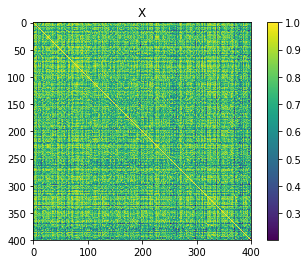

200 -iter
diff between sigma and gt 345.161502421705
diff between two sigmas 1.8914499010378865
num of zeros of sigma: 0


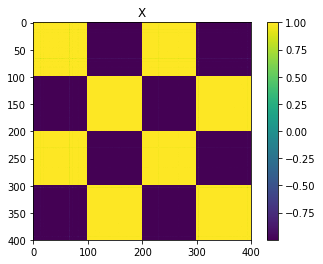

400 -iter
diff between sigma and gt 345.353201054545
diff between two sigmas 1.890995154341361
num of zeros of sigma: 0


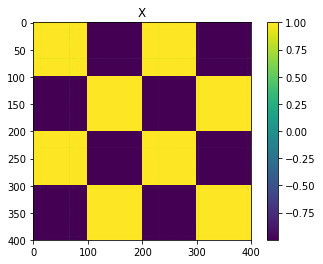

600 -iter
diff between sigma and gt 345.3644741284513
diff between two sigmas 1.8909712008274484
num of zeros of sigma: 0


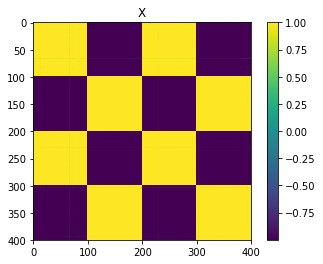

800 -iter
diff between sigma and gt 345.36522900844534
diff between two sigmas 1.8909711499258037
num of zeros of sigma: 0


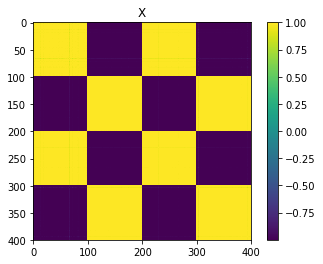

999 -iter(last)
diff between sigma and gt 144.64323333230993
diff between two sigmas 14.207238756431881
num of zeros of sigma: 2025


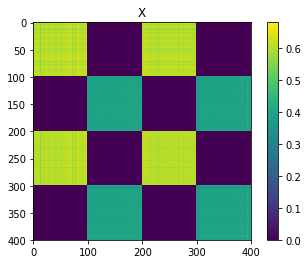

elapsed time:  14.86017656326294


In [8]:
B=A-lamb*np.ones((n,n))
# B=A
k=10
eta=2
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
sigma=proj_mani(np.random.rand(n,k))
max_iter=1000

init=time.time()
for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma,0)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
#     noise=np.random.normal(0,.05,size=(n,k))
    sigma=sigma+(eta)*u
#     sigma=sigma+(eta/(it+1))*u
#     sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
#     if(np.linalg.norm(sigma-sigma_old)<1e-3):
#         eta=eta*1.2
    if(it%(max_iter/5)==0):
        print(it,'-iter')
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
sigma=np.maximum(sigma,0)
print(it,'-iter(last)')
print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
print('num of zeros of sigma:',np.sum(sigma==0))

plt.figure(1)
plt.title('X')
plt.imshow(sigma.dot(sigma.T))
plt.colorbar()
plt.show()
print('elapsed time: ',time.time()-init)


0 -iter
diff between sigma and gt 418.6908343667459
diff between two sigmas 1.9906328584693858
num of zeros of sigma: 0


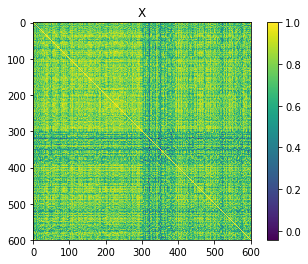

100 -iter
diff between sigma and gt 358.77754976343783
diff between two sigmas 1.9437288406229662
num of zeros of sigma: 0


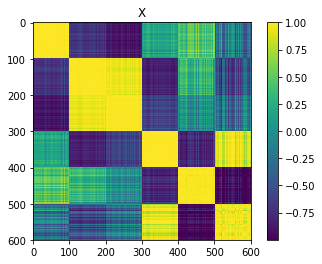

200 -iter
diff between sigma and gt 358.6902793201491
diff between two sigmas 1.9419873599909279
num of zeros of sigma: 0


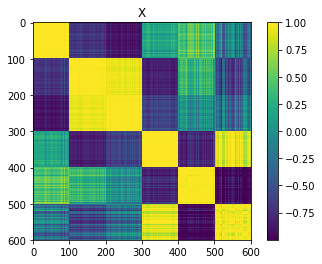

300 -iter
diff between sigma and gt 358.685304816823
diff between two sigmas 1.9416347722291485
num of zeros of sigma: 0


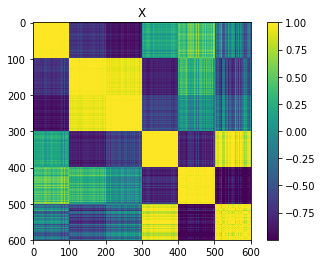

400 -iter
diff between sigma and gt 358.68566917478597
diff between two sigmas 1.941649562514775
num of zeros of sigma: 0


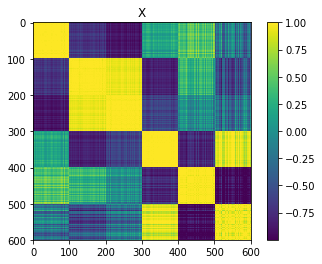

elapsed time:  18.781795740127563


In [16]:
B=A-lamb*np.ones((n,n))
k=10
eta=2
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
sigma=proj_mani(np.random.rand(n,k))
max_iter=500

init=time.time()
for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma,0)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
    sigma=sigma+(eta)*u
#     sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
    
    if(it%(max_iter/5)==0):
        print(it,'-iter')
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
        
print('elapsed time: ',time.time()-init)


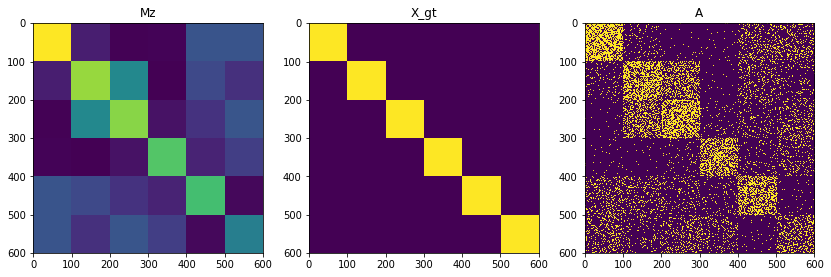

In [17]:
Psi=np.asarray([
    [.670,.072,.020,.023,.186,.187],
    [.072,.570,.321,.016,.160,.107],
    [.020,.321,.555,.048,.111,.188],
    [.023,.016,.048,.494,.081,.137],
    [.186,.160,.111,.081,.475,.031],
    [.187,.107,.188,.137,.031,.295],
])

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.title('Mz')
plt.imshow(Mz)

plt.subplot(132)
plt.title('X_gt')
plt.imshow(X_gt)

plt.subplot(133)
plt.title('A')
plt.imshow(A)

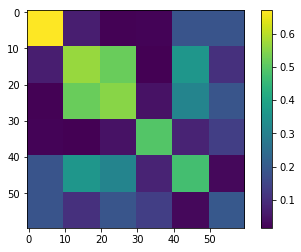

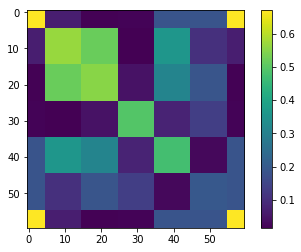

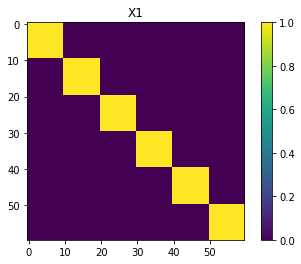

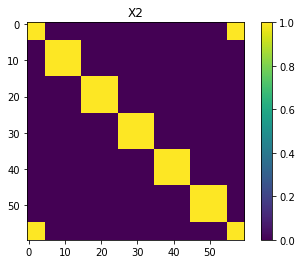

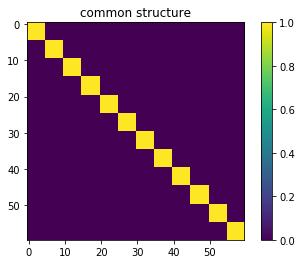

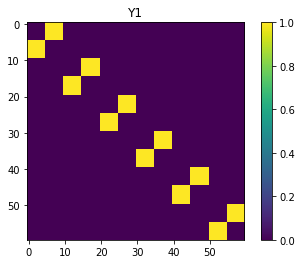

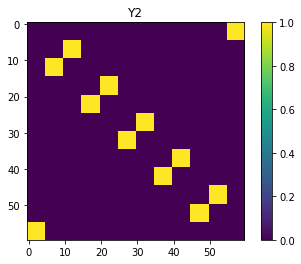

In [2]:
Psi=np.asarray([
    [.670,.072,.020,.023,.186,.187],
    [.072,.570,.521,.016,.360,.107],
    [.020,.521,.555,.048,.311,.188],
    [.023,.016,.048,.494,.081,.137],
    [.186,.360,.311,.081,.475,.031],
    [.187,.107,.188,.137,.031,.195],
])
Z1_gt=np.asarray([1,0,0,0,0,0]*10+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*10+[0,0,0,1,0,0]*10\
                   +[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10).reshape(60,6)
Mz1=Z1_gt.dot(Psi).dot(Z1_gt.T)
X1=Z1_gt.dot(Z1_gt.T)
plt.figure(1)
plt.imshow(Mz1)
plt.colorbar()
plt.show()

Z2_gt=np.asarray([1,0,0,0,0,0]*5+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*10+[0,0,0,1,0,0]*10\
                   +[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10+[1,0,0,0,0,0]*5).reshape(60,6)
Mz2=Z2_gt.dot(Psi).dot(Z2_gt.T)
X2=Z2_gt.dot(Z2_gt.T)
plt.figure(1)
plt.imshow(Mz2)
plt.colorbar()
plt.show()

C=X1*X2
Y1=X1-C
Y2=X2-C

plt.figure(1)
plt.title('X1')
plt.imshow(X1)
plt.colorbar()
plt.show()

plt.title('X2')
plt.imshow(X2)
plt.colorbar()
plt.show()

plt.figure(1)
plt.title('common structure')
plt.imshow(C)
plt.colorbar()
plt.show()

plt.figure(1)
plt.title('Y1')
plt.imshow(Y1)
plt.colorbar()
plt.show()

plt.figure(1)
plt.title('Y2')
plt.imshow(Y2)
plt.colorbar()
plt.show()

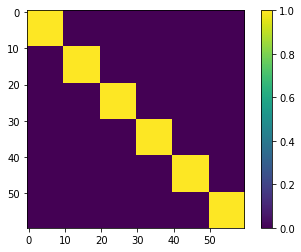

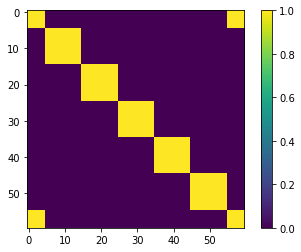

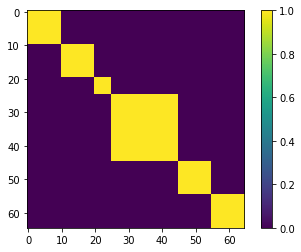

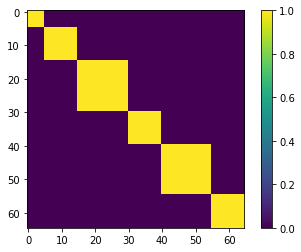

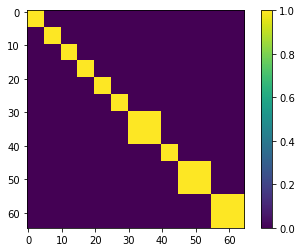

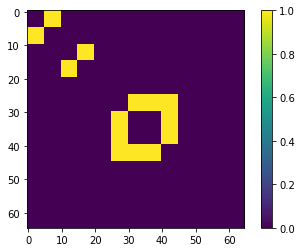

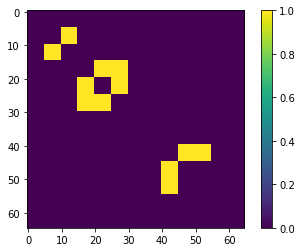

In [3]:
Z0=np.asarray([1,0,0,0,0,0]*10+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*10+[0,0,0,1,0,0]*10\
                   +[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10).reshape(60,6)
X0=Z0.dot(Z0.T)
plt.figure(2)
plt.imshow(X0)
plt.colorbar()
plt.show()

Z0=np.asarray([1,0,0,0,0,0]*5+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*10+[0,0,0,1,0,0]*10\
                   +[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10+[1,0,0,0,0,0]*5).reshape(60,6)
X0=Z0.dot(Z0.T)
plt.figure(2)
plt.imshow(X0)
plt.colorbar()
plt.show()

Z1=np.asarray([1,0,0,0,0,0]*10+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*5+\
               [0,0,0,1,0,0]*20+[0,0,0,0,1,0]*10+[0,0,0,0,0,1]*10).reshape(65,6)
X1=Z1.dot(Z1.T)
plt.figure(2)
plt.imshow(X1)
plt.colorbar()
plt.show()

Z2=np.asarray([1,0,0,0,0,0]*5+[0,1,0,0,0,0]*10+[0,0,1,0,0,0]*15+\
               [0,0,0,1,0,0]*10+[0,0,0,0,1,0]*15+[0,0,0,0,0,1]*10).reshape(65,6)
X2=Z2.dot(Z2.T)
plt.figure(2)
plt.imshow(X2)
plt.colorbar()
plt.show()

C=X1*X2
plt.figure(2)
plt.imshow(C)
plt.colorbar()
plt.show()

Y1=X1-C
Y2=X2-C

plt.figure(2)
plt.imshow(Y1)
plt.colorbar()
plt.show()

plt.figure(2)
plt.imshow(Y2)
plt.colorbar()
plt.show()


In [44]:
# Psi=np.asarray([
#     [.300,.080,.100,.120],
#     [.080,.200,.100,.100],
#     [.100,.100,.200,.100],
#     [.120,.100,.100,.200]
# ])

Psi=np.asarray([
    [.300,.080,.100,.080],
    [.080,.200,.080,.100],
    [.100,.080,.200,.080],
    [.080,.100,.080,.200]
])

n=100
Z_gt=np.asarray([1,0,0,0]*(n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(4*n,4)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
X_gt=Z_gt.dot(Z_gt.T)

A=np.random.binomial(1,Mz)
n=A.shape[0]
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))

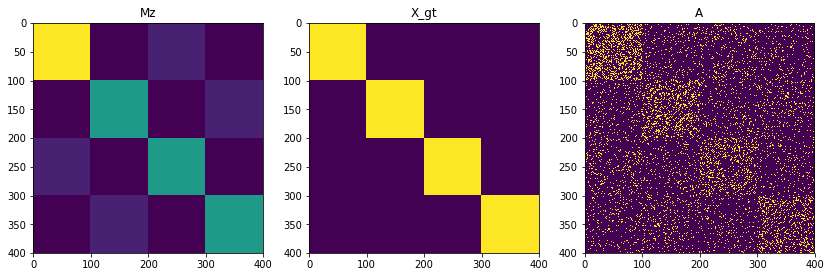

In [45]:
plt.figure(figsize=(14,7))
plt.subplot(131)
plt.title('Mz')
plt.imshow(Mz)

plt.subplot(132)
plt.title('X_gt')
plt.imshow(X_gt)

plt.subplot(133)
plt.title('A')
plt.imshow(A)

In [50]:
import time
np.ones(5)

array([1., 1., 1., 1., 1.])

0 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


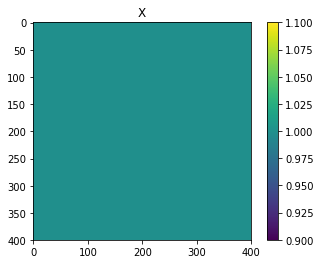

5 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


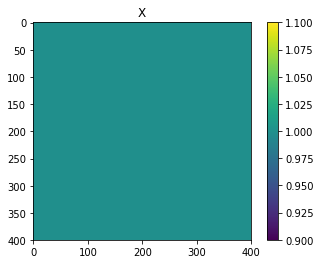

10 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


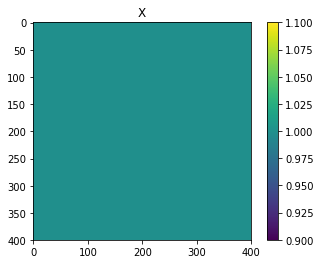

15 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


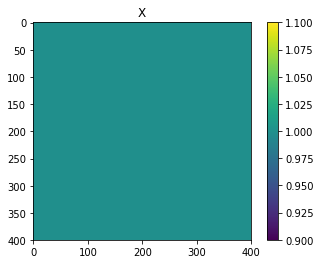

20 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


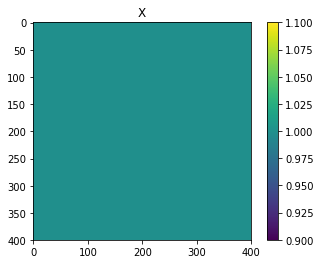

25 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


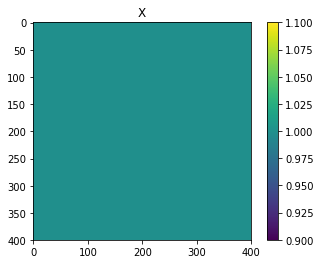

30 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


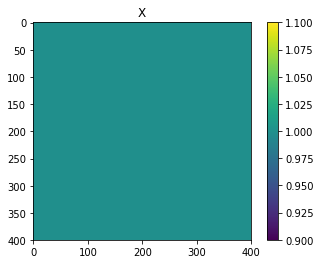

35 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


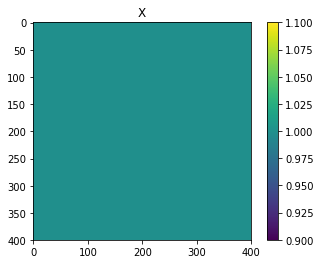

40 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


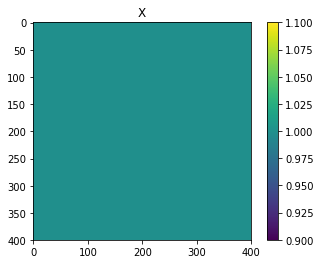

45 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


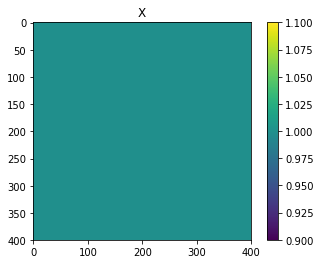

elapsed time:  4.800168991088867


In [49]:
B=A-lamb*np.ones((n,n))
# B=A
k=5
eta=5
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
# sigma=proj_mani(np.random.rand(n,k))
sigma=np.zeros((n,k))
sigma[:,0]=np.ones(n)
max_iter=50

sigma_old=sigma
init=time.time()
a=-np.ones(n)*0.8
for it in range(max_iter):
    tau=np.sum(sigma*sigma_old,axis=1)
    b=-a*tau+np.sqrt((a**2)*(tau**2)-(a**2-1))
    
    mu=sigma*(np.outer(a,np.ones(k)))+sigma_old*(np.outer(b,np.ones(k)))
    sigma_old=sigma
    grad=gradf(mu,0)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
    sigma=mu+(eta)*u
#     sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
    
    if(it%(max_iter/10)==0):
        print(it,'-iter')
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
        
print('elapsed time: ',time.time()-init)


0 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


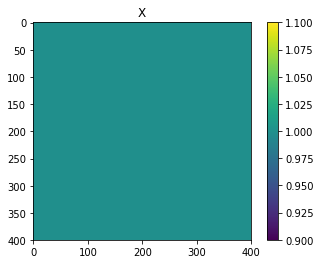

5 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


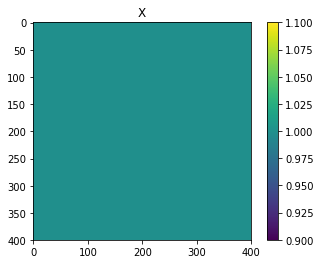

10 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


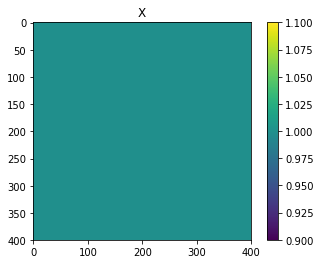

15 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


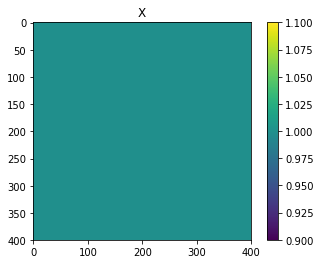

20 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


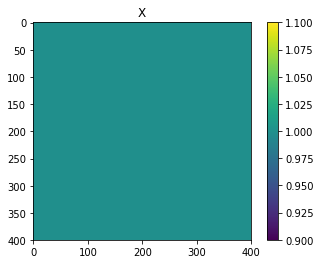

25 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


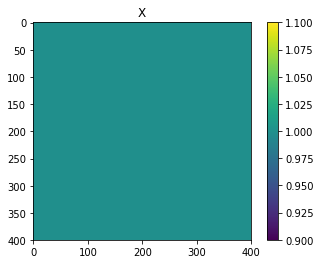

30 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


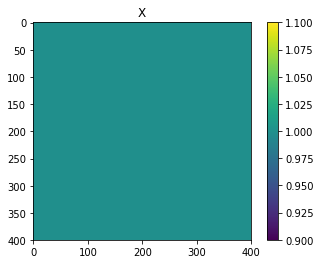

35 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


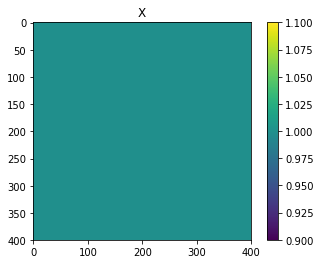

40 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


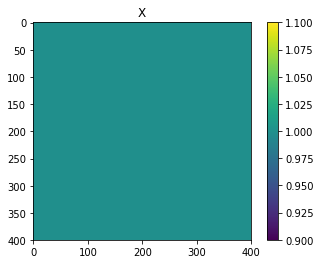

45 -iter
diff between sigma and gt 346.41016151377545
diff between two sigmas 0.0
num of zeros of sigma: 1600


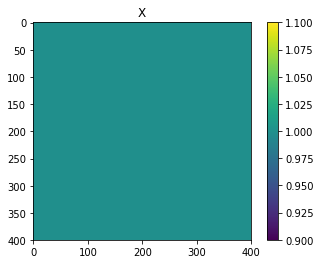

elapsed time:  4.185808897018433


In [51]:
B=A-lamb*np.ones((n,n))
# B=A
k=5
eta=5
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
# sigma=proj_mani(np.random.rand(n,k))
sigma=np.zeros((n,k))
sigma[:,0]=np.ones(n)

max_iter=50

init=time.time()
for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma,0)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
    sigma=sigma+(eta)*u
#     sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
    
    if(it%(max_iter/10)==0):
        print(it,'-iter')
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
        
print('elapsed time: ',time.time()-init)


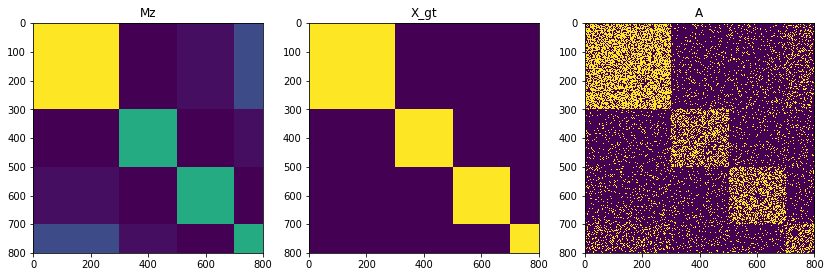

In [64]:
# Psi=np.asarray([
#     [.300,.080,.100,.120],
#     [.080,.200,.100,.100],
#     [.100,.100,.200,.100],
#     [.120,.100,.100,.200]
# ])

# Psi=np.asarray([
#     [.300,.080,.100,.080],
#     [.080,.200,.080,.100],
#     [.100,.080,.200,.080],
#     [.080,.100,.080,.200]
# ])

Psi=np.asarray([
    [.600,.080,.100,.200],
    [.080,.400,.080,.100],
    [.100,.080,.400,.080],
    [.200,.100,.080,.400]
])


n=100
# Z_gt=np.asarray([1,0,0,0]*(2*n)+[0,1,0,0]*(n)+[0,0,1,0]*(n)+[0,0,0,1]*(n)).reshape(5*n,4)
Z_gt=np.asarray([1,0,0,0]*(3*n)+[0,1,0,0]*(2*n)+[0,0,1,0]*(2*n)+[0,0,0,1]*(n)).reshape(8*n,4)
Mz=Z_gt.dot(Psi).dot(Z_gt.T)
X_gt=Z_gt.dot(Z_gt.T)*2-1

A=np.random.binomial(1,Mz)
n=A.shape[0]
A=np.triu(A)+np.triu(A).T-2*np.diag(np.diag(A))
lamb=2/(n*(n-1))*np.sum(np.triu(A)-np.diag(np.diag(A)))

plt.figure(figsize=(14,7))
plt.subplot(131)
plt.title('Mz')
plt.imshow(Mz)

plt.subplot(132)
plt.title('X_gt')
plt.imshow(X_gt)

plt.subplot(133)
plt.title('A')
plt.imshow(A)

0 -iter
diff between sigma and gt 1181.694979902527
diff between two sigmas 8.362803370152793
num of zeros of sigma: 475


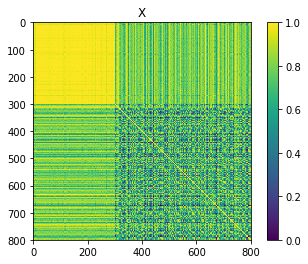

100 -iter
diff between sigma and gt 796.4865290784315
diff between two sigmas 0.049899847307630536
num of zeros of sigma: 2798


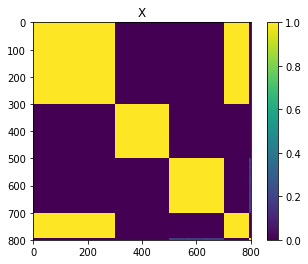

200 -iter
diff between sigma and gt 746.3000763795054
diff between two sigmas 0.3349511297515023
num of zeros of sigma: 2790


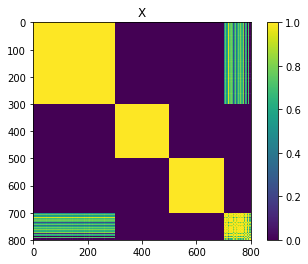

300 -iter
diff between sigma and gt 685.3306522478091
diff between two sigmas 4.1849597222331314e-05
num of zeros of sigma: 2837


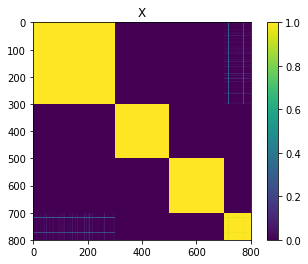

400 -iter
diff between sigma and gt 685.3298328112946
diff between two sigmas 3.315035229195306e-09
num of zeros of sigma: 2837


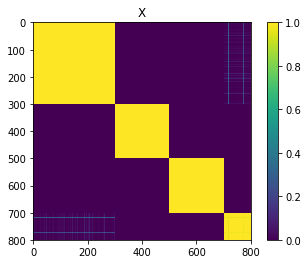

elapsed time:  20.740453958511353


In [65]:
B=A-lamb*np.ones((n,n))
# B=A
k=5
eta=10
# sigma=np.vstack((np.eye(k),np.zeros((n-k,k))))
sigma=proj_mani(np.random.rand(n,k))
max_iter=500

init=time.time()
for it in range(max_iter):
    sigma_old=sigma
    grad=gradf(sigma,0)
    grad_size=np.linalg.norm(grad)   
    
    # Grad-step
    u=grad/grad_size
    
    # update sigma
    sigma=sigma+(eta)*u
    sigma=np.maximum(sigma,0)
    sigma=proj_mani(sigma)
    
#     # update with projection-free
#     gamma=1/(it+1)
#     sigma=(1-gamma)*sigma+gamma*max_eachrow(u)
    
    if(it%(max_iter/5)==0):
        print(it,'-iter')
        print('diff between sigma and gt',np.linalg.norm(sigma.dot(sigma.T)-X_gt))
        print('diff between two sigmas',np.linalg.norm(sigma-sigma_old))
        print('num of zeros of sigma:',np.sum(sigma==0))
        
        plt.figure(1)
        plt.title('X')
        plt.imshow(sigma.dot(sigma.T))
        plt.colorbar()
        plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma.dot(sigma.T)')
#         plt.hist(sigma.dot(sigma.T), bins='auto')
#         plt.show()
        
#         plt.figure(figsize=(8,8))
#         plt.title('sigma')
#         plt.imshow(sigma)
#         plt.colorbar()
#         plt.show()
        
#         plt.figure(1)
#         plt.title('histogram of sigma')
#         plt.hist(sigma, bins='auto')
#         plt.show()
        
print('elapsed time: ',time.time()-init)
